In [1]:
import matplotlib.pyplot as plt
import numpy as np
import dask.array as da
import zarr as zr
import django
from dask.distributed import Client, progress

django.setup()
from elements.models import Zarr
from dask.distributed import Client, progress
c = Client()
import xarray, h5py

Debugging build


2020-01-13 20:56:08,452 [elements.extenders] INFO     Extending DataArray


Hallo


In [50]:

from bioconverter.models import Conversing,Representation

In [51]:
met = Conversing.objects.last()

In [52]:
array = Representation.objects.filter(sample=244).last().loadArray()


/code/media/zarr/sample-244


In [60]:
array

<xarray.DataArray 'data' (x: 1256, y: 1256, channel: 2, z: 28, time: 1)>
dask.array<zarr, shape=(1256, 1256, 2, 28, 1), dtype=float64, chunksize=(157, 314, 1, 7, 1)>
Coordinates:
  * channel  (channel) <U6 'Ch1-T1' 'Ch1-T2'
    phsyz    (z) float64 dask.array<chunksize=(28,), meta=np.ndarray>
    physx    (x) float64 dask.array<chunksize=(1256,), meta=np.ndarray>
    physy    (y) float64 dask.array<chunksize=(1256,), meta=np.ndarray>
  * time     (time) int64 0
  * x        (x) int64 0 1 2 3 4 5 6 7 ... 1249 1250 1251 1252 1253 1254 1255
  * y        (y) int64 0 1 2 3 4 5 6 7 ... 1249 1250 1251 1252 1253 1254 1255
  * z        (z) int64 0 1 2 3 4 5 6 7 8 9 10 ... 18 19 20 21 22 23 24 25 26 27
Attributes:
    channels:  [{'AcquisitionMode': 'LaserScanningConfocalMicroscopy', 'Color...
    planes:    [{'DeltaT': '12410.572591590908', 'PositionX': '-628', 'Positi...
    scan:      [{'PhysicalSizeX': '0.049345442271087926', 'PhysicalSizeXUnit'...

In [55]:
it = array

In [94]:
volume = it.max(dim="time").max(dim="z")
volume

<xarray.DataArray 'data' (x: 1256, y: 1256, channel: 2)>
dask.array<nanmax-aggregate, shape=(1256, 1256, 2), dtype=float64, chunksize=(157, 314, 1)>
Coordinates:
  * channel  (channel) <U6 'Ch1-T1' 'Ch1-T2'
    physx    (x) float64 dask.array<chunksize=(1256,), meta=np.ndarray>
    physy    (y) float64 dask.array<chunksize=(1256,), meta=np.ndarray>
  * x        (x) int64 0 1 2 3 4 5 6 7 ... 1249 1250 1251 1252 1253 1254 1255
  * y        (y) int64 0 1 2 3 4 5 6 7 ... 1249 1250 1251 1252 1253 1254 1255

In [105]:
zeros = xarray.DataArray(da.zeros((1256,1256,1)), dims=["x","y","channel"], coords={"channel":["EmptyChannel"]})
zeros

<xarray.DataArray 'zeros-ee42a025f58b0b4346e019f057f447d2' (x: 1256, y: 1256, channel: 1)>
dask.array<zeros, shape=(1256, 1256, 1), dtype=float64, chunksize=(1256, 1256, 1)>
Coordinates:
  * channel  (channel) <U12 'EmptyChannel'
Dimensions without coordinates: x, y

In [106]:
volume2 = xarray.concat([zeros,volume],dim="channel")

In [107]:
volume2

<xarray.DataArray 'zeros-ee42a025f58b0b4346e019f057f447d2' (x: 1256, y: 1256, channel: 3)>
dask.array<concatenate, shape=(1256, 1256, 3), dtype=float64, chunksize=(157, 314, 1)>
Coordinates:
    physx    (x) float64 dask.array<chunksize=(1256,), meta=np.ndarray>
    physy    (y) float64 dask.array<chunksize=(1256,), meta=np.ndarray>
  * y        (y) int64 0 1 2 3 4 5 6 7 ... 1249 1250 1251 1252 1253 1254 1255
  * x        (x) int64 0 1 2 3 4 5 6 7 ... 1249 1250 1251 1252 1253 1254 1255
  * channel  (channel) object 'EmptyChannel' 'Ch1-T1' 'Ch1-T2'

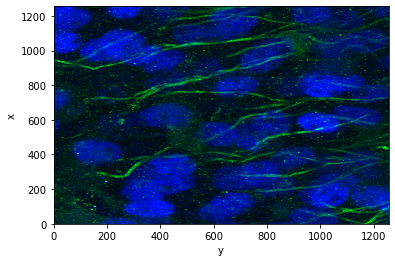

In [108]:
volume2.plot.imshow(rgb="channel")

In [31]:

import ipyvolume as ipv
ipv.quickvolshow(volume)

/opt/conda/lib/python3.7/site-packages/ipyvolume/widgets.py:179: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data_view = self.data_original[view]
/opt/conda/lib/python3.7/site-packages/ipyvolume/utils.py:204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data = (data[slices1] + data[slices2])/2


In [ ]:
import napari

with napari.gui_qt():
    # specify contrast_limits and is_pyramid=False with big data
    # to avoid unecessary computations
    napari.view_image(it, contrast_limits=[0,2000], is_pyramid=False)

In [7]:
%gui qt

tornado.application - ERROR - Exception in callback functools.partial(<function Kernel.enter_eventloop.<locals>.advance_eventloop at 0x7f26e4fa1950>)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 314, in advance_eventloop
    eventloop(self)
  File "/opt/conda/lib/python3.7/site-packages/ipykernel/eventloops.py", line 129, in loop_qt5
    return loop_qt4(kernel)
  File "/opt/conda/lib/python3.7/site-packages/ipykernel/eventloops.py", line 116, in loop_qt4
    kernel.app = get_app_qt4([" "])
  File "/opt/conda/lib/python3.7/site-packages/IPython/lib/guisupport.py", line 114, in get_app_qt4
    from IPython.external.qt_for_kernel import QtGui
  File "/opt/conda/lib/python3.7/site-packages/IPython/external/qt_for_kernel.py", line 95, in <module>
    QtCore, QtGui, QtSvg, QT_API = load_qt(api_opts)
  File "/opt

In [ ]:
import napari

with napari.gui_qt():
    # specify contrast_limits and is_pyramid=False with big data
    # to avoid unecessary computations
    napari.view_image(it, contrast_limits=[0,2000], is_pyramid=False)

/opt/conda/lib/python3.7/site-packages/qtpy/__init__.py:216: RuntimeWarning: Selected binding "pyqt5" could not be found, using "pyside2"
  'using "{}"'.format(initial_api, API), RuntimeWarning)


In [6]:
cmax = array.max()
cmin = array.min()
high = 255
low = 0

In [7]:
cscale = cmax - cmin
scale = float(high - low) / cscale

In [8]:
scaled = (array - cmin) * scale + low
final = (scaled.clip(low, high) + 0.5)

In [9]:
emptychannel = xarray.DataArray((da.zeros((1256,1256,1,28))), dims=array.dims, coords={"channels":["empty",]})
end = xarray.concat([array,emptychannel],dim="channels")
end.attrs = array.attrs

In [12]:
shape_3d = end.shape[0:3]

In [14]:
rgb_dtype = np.dtype([('R', 'u1'), ('G', 'u1'), ('B', 'u1')])

In [ ]:
contugious = np.ascontiguousarray(end, dtype='u1')